In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
# Step 1: Generate synthetic data
np.random.seed(42)
X = np.vstack([
    np.random.normal([2, 2], 0.5, (100, 2)),
    np.random.normal([7, 7], 0.5, (100, 2)),
    np.random.normal([2, 7], 0.5, (100, 2))
])

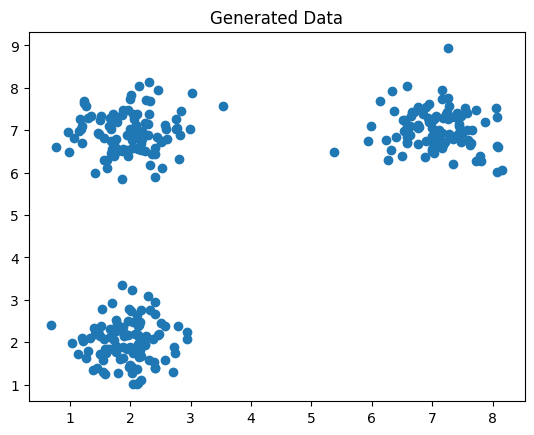

In [14]:
#ploat the generated data
plt.scatter(X[:, 0], X[:, 1])   
plt.title("Generated Data")
plt.show()

In [20]:
# Step 2: Initialize K and centroids
K = 3
centroids = X[np.random.choice(X.shape[0], K, replace=False)]
print("Initial Centroids:\n", centroids)


Initial Centroids:
 [[2.76156204 7.26945502]
 [7.03490104 6.8073432 ]
 [7.3431301  6.19364206]]


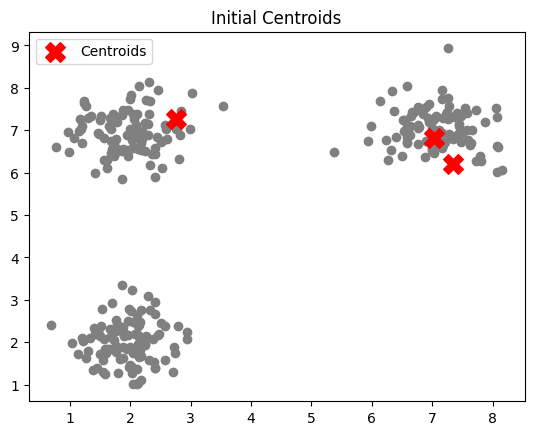

In [21]:
# plot the initial centroids
plt.scatter(X[:, 0], X[:, 1], c='gray')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("Initial Centroids")
plt.legend()
plt.show()

# Splitting the K-Means-from-scratch code into clear steps and visualizing changes **step-by-step**.
- This cell will:
1. Generate synthetic 2D data
2. Provide well-separated functions: initialize, assign, update, run (history)
3. Plot final result and centroid trajectories
4. Create an animation that shows how labels & centroids change each iteration

Note: plots avoid setting explicit colors/styles (per instructions).

In [29]:
# ================================================================
# K-Means Clustering (from scratch) – Step-by-Step Visualization
# ================================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# ------------------------ Step 1: Generate synthetic data ------------------------
np.random.seed(42)
X = np.vstack([
    np.random.normal([2, 2], 0.5, (100, 2)),
    np.random.normal([7, 7], 0.5, (100, 2)),
    np.random.normal([2, 4], 0.5, (100, 2))
])


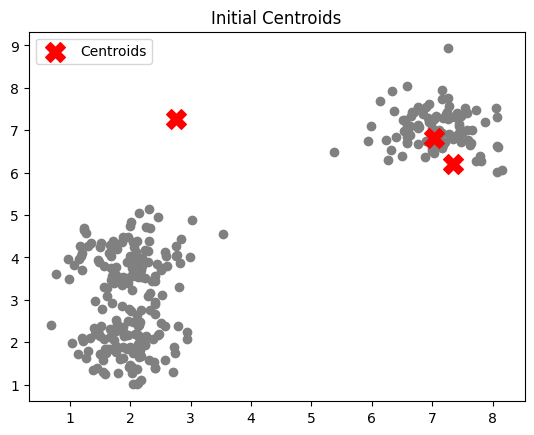

In [39]:

# ------------------------ Step 2: Define K-Means helper functions ------------------------

def initialize_centroids(X, K, seed=None):
    """Randomly choose K points from X as initial centroids."""
    if seed is not None:
        np.random.seed(seed)
    indices = np.random.choice(X.shape[0], K, replace=False)
    return X[indices].astype(float)

def assign_clusters(X, centroids):
    """Assign each sample in X to the nearest centroid (Euclidean distance)."""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # shape: (n_samples, K)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, K, old_centroids=None):
    """
    Compute new centroids as the mean of assigned points.
    If a cluster has no points, keep the old centroid (if provided).
    """
    new_centroids = []
    for k in range(K):
        pts = X[labels == k]
        if pts.shape[0] == 0:  # Handle empty cluster
            if old_centroids is not None:
                new_centroids.append(old_centroids[k].copy())
            else:
                new_centroids.append(X[np.random.choice(X.shape[0])].copy())
        else:
            new_centroids.append(pts.mean(axis=0))
    return np.array(new_centroids)

def kmeans_history(X, K, max_iters=50, tol=1e-6):
    """
    Run K-Means and store history for visualization.
    Returns a dictionary containing centroids and labels at each iteration.
    """
    centroids = initialize_centroids(X, K, seed=42)
    # plot the initial centroids
    plt.scatter(X[:, 0], X[:, 1], c='gray')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title("Initial Centroids")
    plt.legend()
    plt.show()
    history = {'centroids': [centroids.copy()], 'labels': []}

    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        history['labels'].append(labels.copy())
        new_centroids = update_centroids(X, labels, K, old_centroids=centroids)
        history['centroids'].append(new_centroids.copy())
        print(f"Iteration {i+1}: Centroids updated to\n{new_centroids}\n")
        # Check for convergence
        if np.allclose(centroids, new_centroids, atol=tol):
            break
        centroids = new_centroids

    history['n_iters'] = len(history['labels'])
    return history



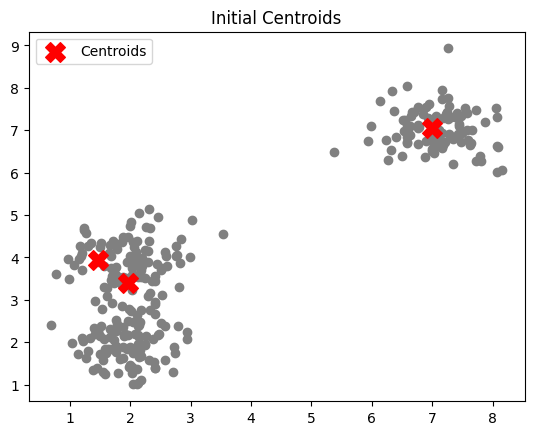

Iteration 1: Centroids updated to
[[1.67528642 4.24509347]
 [2.04484898 2.59813755]
 [7.06412436 7.02174382]]

Iteration 2: Centroids updated to
[[1.96428145 4.03864024]
 [1.95636742 2.14274233]
 [7.06412436 7.02174382]]

Iteration 3: Centroids updated to
[[1.98253798 3.94649444]
 [1.9371612  2.00738038]
 [7.06412436 7.02174382]]

Iteration 4: Centroids updated to
[[1.98253798 3.94649444]
 [1.9371612  2.00738038]
 [7.06412436 7.02174382]]

✅ Converged after 4 iterations.


In [40]:
# ------------------------ Step 3: Run K-Means ------------------------
K = 3
history = kmeans_history(X, K, max_iters=50)
n_iters = history['n_iters']
print(f"✅ Converged after {n_iters} iterations.")

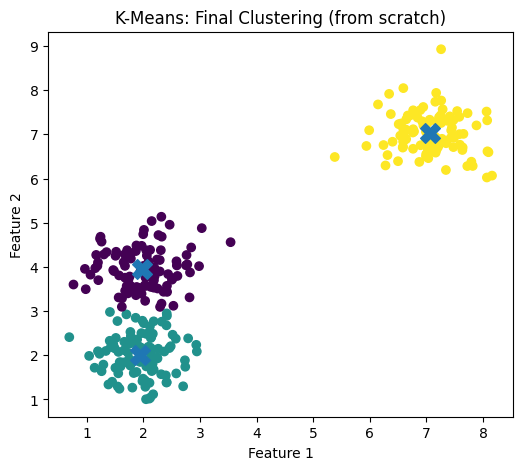

In [33]:
# ------------------------ Step 4: Plot Final Results ------------------------
final_labels = history['labels'][-1]
final_centroids = history['centroids'][-1]

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=final_labels)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='X', s=200)
plt.title("K-Means: Final Clustering (from scratch)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

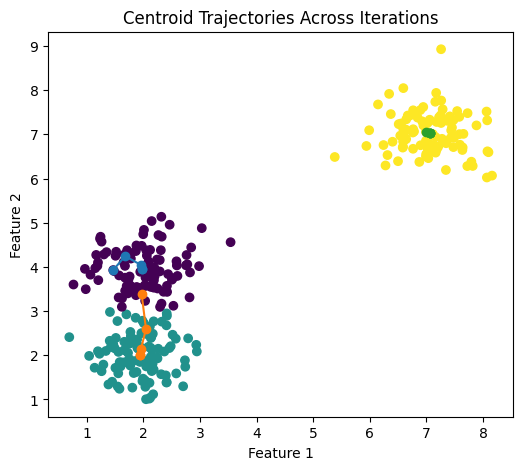

In [34]:
# ------------------------ Step 5: Plot Centroid Trajectories ------------------------
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=final_labels)
centroids_array = np.stack(history['centroids'])  # shape: (iters+1, K, 2)
for k in range(K):
    traj = centroids_array[:, k, :]
    plt.plot(traj[:, 0], traj[:, 1], marker='o')  # centroid path
plt.title("Centroid Trajectories Across Iterations")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

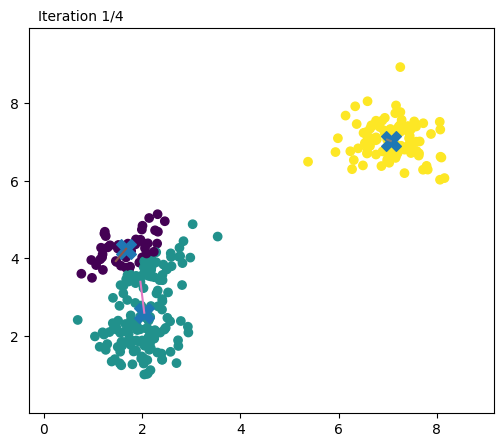

In [35]:






# ------------------------ Step 6: Create Animation ------------------------
fig, ax = plt.subplots(figsize=(6, 5))
ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

scat = ax.scatter(X[:, 0], X[:, 1], c=history['labels'][0])
cent_scat = ax.scatter(history['centroids'][0][:, 0], history['centroids'][0][:, 1],
                       marker='X', s=200)
title = ax.text(0.02, 1.02, "", transform=ax.transAxes)

def clear_lines(ax):
    """Safely remove previous centroid movement lines."""
    for line in list(ax.lines):
        line.remove()

def update(frame):
    """Update plot for each iteration of K-Means."""
    labels = history['labels'][frame]
    centroids_now = history['centroids'][frame + 1]
    centroids_prev = history['centroids'][frame]

    scat.set_array(labels)
    cent_scat.set_offsets(centroids_now)
    title.set_text(f"Iteration {frame + 1}/{n_iters}")

    clear_lines(ax)
    for p, c in zip(centroids_prev, centroids_now):
        ax.plot([p[0], c[0]], [p[1], c[1]])

    return scat, cent_scat, title

anim = animation.FuncAnimation(fig, update, frames=n_iters, interval=800, blit=False)
HTML(anim.to_jshtml())


# Using scikit-learn for K-Means

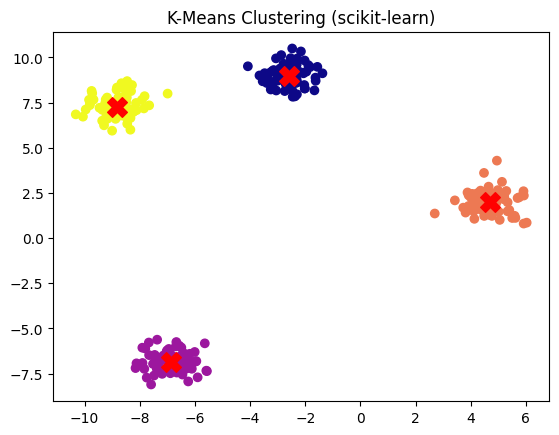

In [42]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Results
y_pred = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='plasma')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
plt.title("K-Means Clustering (scikit-learn)")
plt.show()


7. How to Choose the Right Number of Clusters (K)

1️⃣ Elbow Method 

- Compute the inertia (SSE) for different K values and find the “elbow point”.

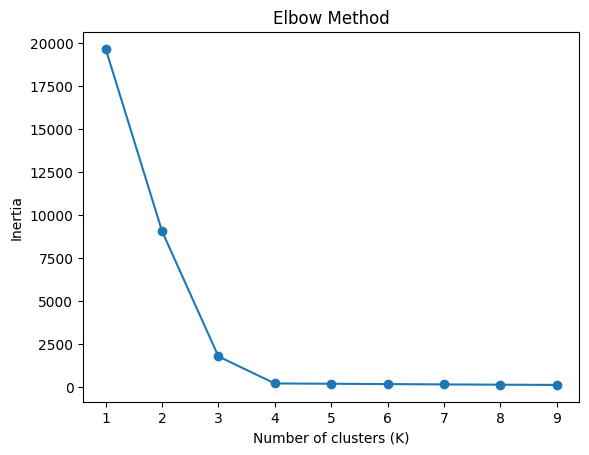

In [43]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


# 2️⃣ Silhouette Score

- Measures how similar an object is to its own cluster compared to others.


In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f'K={k}, Silhouette Score={score:.3f}')
